<a href="https://colab.research.google.com/github/JDsapuy/Prueba/blob/main/Ejemplo_Analisis_Datos_Datos_Abiertos_GUIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sodapy

In [ ]:
#Punto 1
#Cargue el dataset disponible en
#https://www.datos.gov.co/Econom-a-y-Finanzas/Tasa-de-Cambio-Representativa-del-Mercado-TRM/32sa-8pi3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("32sa-8pi3")
df=pd.DataFrame.from_records(result)
df.head()

,valor,unidad,vigenciadesde,vigenciahasta
0,3894.37,COP,2024-03-20T00:00:00.000,2024-03-20T00:00:00.000
1,3880.59,COP,2024-03-19T00:00:00.000,2024-03-19T00:00:00.000
2,3884.64,COP,2024-03-16T00:00:00.000,2024-03-18T00:00:00.000
3,3899.39,COP,2024-03-15T00:00:00.000,2024-03-15T00:00:00.000
4,3908.02,COP,2024-03-14T00:00:00.000,2024-03-14T00:00:00.000


df.info nos proporcionará toda la información del dataframe recogido con el código anterior, ya sea número de columnas, tipo de dato de cada una, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          1000 non-null   object
 1   unidad         1000 non-null   object
 2   vigenciadesde  1000 non-null   object
 3   vigenciahasta  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


A la variable valor se le asignarán todos los valores numéricos de nuestro DataFrame, con un filtro a prueba de errores, para que cualquier dato no numérico en la columna "valor", lo convierta en NaN.

In [ ]:
valor=pd.to_numeric(df['valor'], errors='coerce')
print(valor)

0      3894.37
1      3880.59
2      3884.64
3      3899.39
4      3908.02
        ...   
995    3272.62
996    3253.89
997    3254.42
998    3264.26
999    3262.05
Name: valor, Length: 1000, dtype: float64


Estadísticas descriptivas sobre la Serie valor, que es la columna del DataFrame df que contiene los valores numéricos.

In [ ]:
#Punto 2
#Calcular
#a. Media
#b. Mediana
#c. Desviación estándar
#d. Máximo
#e. Mínimo
#f. Rango
print('El valor de la media es: ',round(np.mean(valor),3))
print('El valor de la mediana es: ',round(np.median(valor),3))
print('El valor de la desviacion estandar es: ',round(np.std(valor),3))
print('El valor del máximo es: ',round(np.max(valor),3))
print('El valor del mínimo es: ',round(np.min(valor),3))
print('El valor del rango es: ',round(np.max(valor),3)-round(np.min(valor),3))

El valor de la media es:  4000.47778
El valor de la mediana es:  3923.785
El valor de la desviacion estandar es:  389.113
El valor del máximo es:  5061.21
El valor del mínimo es:  3253.89
El valor del rango es:  1807.3200000000002


Descripción concisa de un DataFrame, incluyendo información sobre el índice, el tipo de datos de cada columna y la cantidad de valores no nulos.

In [ ]:
#Punto 3
#Presentar el resumen de los datos numéricos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valor          1000 non-null   object 
 1   unidad         1000 non-null   object 
 2   vigenciadesde  1000 non-null   object 
 3   vigenciahasta  1000 non-null   object 
 4   Valor_n        1000 non-null   float64
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


Agrega la Serie valor, que contiene los valores numéricos resultantes de la conversión de la columna 'valor', como una nueva columna llamada 'Valor_n' al DataFrame df.

In [ ]:
df['Valor_n']=valor
df

,valor,unidad,vigenciadesde,vigenciahasta,Valor_n
0,3894.37,COP,2024-03-20T00:00:00.000,2024-03-20T00:00:00.000,3894.37
1,3880.59,COP,2024-03-19T00:00:00.000,2024-03-19T00:00:00.000,3880.59
2,3884.64,COP,2024-03-16T00:00:00.000,2024-03-18T00:00:00.000,3884.64
3,3899.39,COP,2024-03-15T00:00:00.000,2024-03-15T00:00:00.000,3899.39
4,3908.02,COP,2024-03-14T00:00:00.000,2024-03-14T00:00:00.000,3908.02
...,...,...,...,...,...
995,3272.62,COP,2020-01-11T00:00:00.000,2020-01-13T00:00:00.000,3272.62
996,3253.89,COP,2020-01-10T00:00:00.000,2020-01-10T00:00:00.000,3253.89
997,3254.42,COP,2020-01-09T00:00:00.000,2020-01-09T00:00:00.000,3254.42
998,3264.26,COP,2020-01-08T00:00:00.000,2020-01-08T00:00:00.000,3264.26


describe() se utiliza para generar estadísticas descriptivas de un DataFrame. Estas estadísticas incluyen recuento, media, desviación estándar, mínimo, máximo y los cuartiles (25%, 50%, y 75%) para las columnas numéricas del DataFrame.

In [ ]:
df.describe()

,Valor_n
count,1000.000000
mean,4000.477780
std,389.308077
min,3253.890000
25%,3752.640000
50%,3923.785000
75%,4155.757500
max,5061.210000


In [ ]:
#Punto 4
#Presentar la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valor          1000 non-null   object 
 1   unidad         1000 non-null   object 
 2   vigenciadesde  1000 non-null   object 
 3   vigenciahasta  1000 non-null   object 
 4   Valor_n        1000 non-null   float64
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


**Análisis del Data Set.**

Se evidencia que el data set original no cuenta con los tipos datos semejantes a la descripción de la pagina de datos abierto. Dado que la columna "valor" no es de tipo numero sino de tipo "object".

La operación que se realizó fue hacer una conversión a numeros flotantes y luego adjuntarla al DataFrame

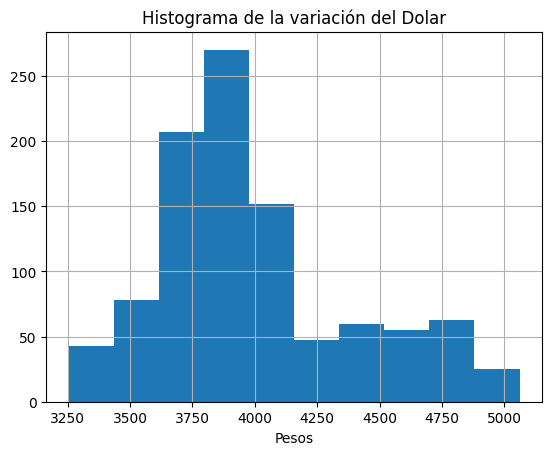

In [ ]:
#Punto 5
#Hacer dos representaciones graficas que sean acordes a la naturaleza de los datos

df.hist(bins=10) # histograma de la variación del dólar con 10 intervalos y lo mostrará en la salida.
plt.title('Histograma de la variación del Dolar')
plt.xlabel('Pesos')
plt.show()

df.plot(): Este método genera un gráfico de línea para todas las columnas numéricas en el DataFrame df. Por defecto, utiliza la primera columna como eje x y las demás como ejes y.



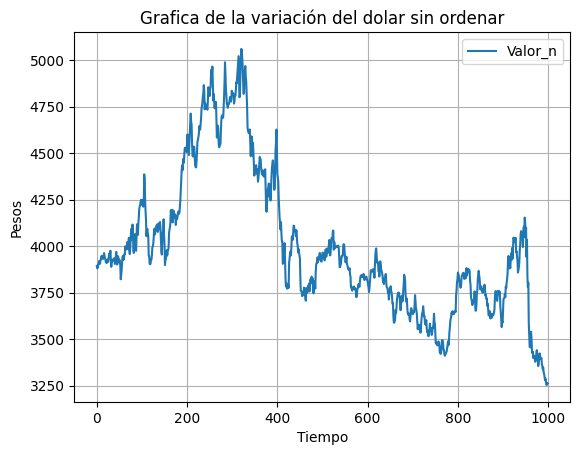

In [ ]:
df.plot()
plt.title('Grafica de la variación del dolar sin ordenar')
plt.xlabel('Tiempo')
plt.ylabel('Pesos')
plt.grid()
plt.show()

Ordena el DataFrame df según la columna 'vigenciadesde' y luego traza un gráfico de la variación histórica del dólar utilizando las fechas ordenadas y los valores correspondientes.

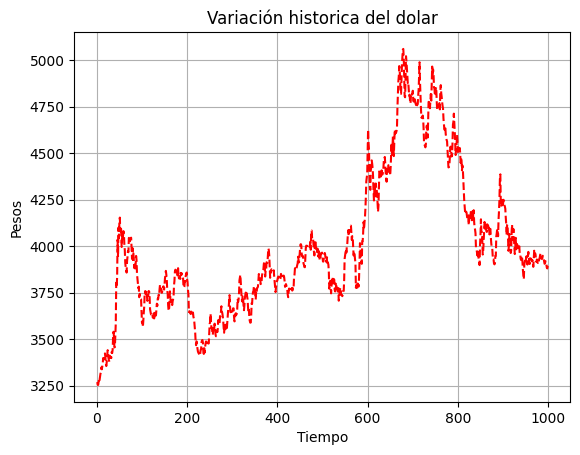

In [ ]:
#Ordenar las fechas y valores del data Frame
data_o=df.sort_values(by=['vigenciadesde'])
valores=list(data_o['Valor_n'])
plt.plot(valores,'r--') #'r--' argumento de estilo para especificar que la línea sea de color rojo y tenga un estilo de línea discontinua.
plt.title('Variación historica del dolar')
plt.xlabel('Tiempo')
plt.ylabel('Pesos')
plt.grid()
plt.show()

data_o.head(1): Este método devuelve las primeras filas del DataFrame data_o, en este caso, se especifica 1 para obtener solo la primera fila.

In [ ]:
print(data_o.head(1))


       valor unidad            vigenciadesde            vigenciahasta  Valor_n
999  3262.05    COP  2020-01-04T00:00:00.000  2020-01-07T00:00:00.000  3262.05


data_o.tail(): Este método devuelve las últimas filas del DataFrame data_o. Por defecto, devuelve las últimas 5 filas.

In [ ]:
print(data_o.tail())

     valor unidad            vigenciadesde            vigenciahasta  Valor_n
4  3908.02    COP  2024-03-14T00:00:00.000  2024-03-14T00:00:00.000  3908.02
3  3899.39    COP  2024-03-15T00:00:00.000  2024-03-15T00:00:00.000  3899.39
2  3884.64    COP  2024-03-16T00:00:00.000  2024-03-18T00:00:00.000  3884.64
1  3880.59    COP  2024-03-19T00:00:00.000  2024-03-19T00:00:00.000  3880.59
0  3894.37    COP  2024-03-20T00:00:00.000  2024-03-20T00:00:00.000  3894.37


Socrata('www.datos.gov.co', None): Crea una instancia del cliente Socrata para interactuar con el portal de datos públicos de Colombia (www.datos.gov.co). El segundo argumento None indica que no se requiere un token de acceso para acceder a los conjuntos de datos públicos.

In [ ]:
#Punto 6
#Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia.
#Se usa un data set del parque automotor del departamento de Boyacá.
cliente2=Socrata('www.datos.gov.co', None)
result=cliente2.get("874t-i57z")
df_auto=pd.DataFrame.from_records(result)
df_auto.head()

,municipio,clase,marca,linea,modelo,carroceria,pasajeros,tonelaje,cilindraje,servicio,estado,blindaje,importado,puertas
0,COMBITA,CAMIONETA,CHEVROLET,SIN LINEA,1951,PANEL,0,1.00,2500,PARTICULAR,ACTIVO,N,N,2
1,SOGAMOSO,AUTOMOVIL,CHEVROLET,IMPALA,1959,COUPE,5,0.00,2400,PARTICULAR,ACTIVO,N,S,2
2,PAIPA,CAMIONETA,MERCURY,SIN LINEA,1950,ESTACA,0,1.00,1,PARTICULAR,ACTIVO,N,N,2
3,TUNJA,CAMPERO,JEEP WILLYS,STATION WAGON,1964,STATION WAGON,5,0.00,2400,PARTICULAR,ACTIVO,N,N,2
4,SANTA ROSA DE VITERBO,CAMIONETA,PLYMOUHT,VALIANT,1955,ESTACA,5,0.75,2200,PARTICULAR,ACTIVO,N,N,2


El método info() en panda proporciona información concisa sobre un DataFrame, incluyendo el tipo de datos de cada columna, la cantidad de valores no nulos y la cantidad total de memoria utilizada.

In [ ]:
#Punto 7
#Realice las tareas de limpieza y transformación necesarias
#Liempiza Quitar datos nulos
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   municipio   1000 non-null   object
 1   clase       1000 non-null   object
 2   marca       1000 non-null   object
 3   linea       956 non-null    object
 4   modelo      1000 non-null   object
 5   carroceria  1000 non-null   object
 6   pasajeros   1000 non-null   object
 7   tonelaje    1000 non-null   object
 8   cilindraje  1000 non-null   object
 9   servicio    1000 non-null   object
 10  estado      1000 non-null   object
 11  blindaje    996 non-null    object
 12  importado   991 non-null    object
 13  puertas     1000 non-null   object
dtypes: object(14)
memory usage: 109.5+ KB


df_auto.dropna(axis=0, how='any'): Este método elimina las filas que contienen al menos un valor nulo. El parámetro axis=0 indica que queremos eliminar filas, y how='any' especifica que una fila será eliminada si contiene al menos un valor nulo en cualquier columna.

In [ ]:
#Eliminar filas con dato nulos
df_auto=df_auto.dropna(axis=0, how='any')
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   municipio   951 non-null    object
 1   clase       951 non-null    object
 2   marca       951 non-null    object
 3   linea       951 non-null    object
 4   modelo      951 non-null    object
 5   carroceria  951 non-null    object
 6   pasajeros   951 non-null    object
 7   tonelaje    951 non-null    object
 8   cilindraje  951 non-null    object
 9   servicio    951 non-null    object
 10  estado      951 non-null    object
 11  blindaje    951 non-null    object
 12  importado   951 non-null    object
 13  puertas     951 non-null    object
dtypes: object(14)
memory usage: 111.4+ KB


Este código mostrará un resumen estadístico de todas las columnas numéricas en el DataFrame df_auto.

In [ ]:
df_auto.describe()

,municipio,clase,marca,linea,modelo,carroceria,pasajeros,tonelaje,cilindraje,servicio,estado,blindaje,importado,puertas
count,951,951,951,951,951,951,951,951,951,951,951,951,951,951
unique,17,11,55,376,47,41,13,19,73,1,1,2,4,7
top,PAIPA,AUTOMOVIL,CHEVROLET,SIN LINEA,2007,SEDAN,5,0.00,1600,PARTICULAR,ACTIVO,N,N,4
freq,558,421,345,84,227,353,610,747,130,951,951,899,766,435


Este código mostrará las primeras filas del DataFrame df_auto, lo que te permitirá ver los datos limpios y listos para su análisis posterior.

In [ ]:
df_auto.head()

,municipio,clase,marca,linea,modelo,carroceria,pasajeros,tonelaje,cilindraje,servicio,estado,blindaje,importado,puertas
0,COMBITA,CAMIONETA,CHEVROLET,SIN LINEA,1951,PANEL,0,1.00,2500,PARTICULAR,ACTIVO,N,N,2
1,SOGAMOSO,AUTOMOVIL,CHEVROLET,IMPALA,1959,COUPE,5,0.00,2400,PARTICULAR,ACTIVO,N,S,2
2,PAIPA,CAMIONETA,MERCURY,SIN LINEA,1950,ESTACA,0,1.00,1,PARTICULAR,ACTIVO,N,N,2
3,TUNJA,CAMPERO,JEEP WILLYS,STATION WAGON,1964,STATION WAGON,5,0.00,2400,PARTICULAR,ACTIVO,N,N,2
4,SANTA ROSA DE VITERBO,CAMIONETA,PLYMOUHT,VALIANT,1955,ESTACA,5,0.75,2200,PARTICULAR,ACTIVO,N,N,2


duplicated() se utiliza para identificar registros duplicados en un DataFrame. Devuelve una Serie booleana (True si es duplicada, False si no lo es) que indica si cada fila es un duplicado de otra fila en el DataFrame.

In [ ]:
#Revisar si hay registros duplicados
print(df_auto.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 951, dtype: bool


df_auto.drop_duplicates(inplace=True): Este método elimina los registros duplicados del DataFrame df_auto. El argumento inplace=True indica que se realice la eliminación directamente en el DataFrame original, es decir, modifica el DataFrame df_auto en su lugar y no devuelve un nuevo DataFrame.


In [ ]:
df_auto.drop_duplicates(inplace = True)
df_auto

,municipio,clase,marca,linea,modelo,carroceria,pasajeros,tonelaje,cilindraje,servicio,estado,blindaje,importado,puertas
0,COMBITA,CAMIONETA,CHEVROLET,SIN LINEA,1951,PANEL,0,1.00,2500,PARTICULAR,ACTIVO,N,N,2
1,SOGAMOSO,AUTOMOVIL,CHEVROLET,IMPALA,1959,COUPE,5,0.00,2400,PARTICULAR,ACTIVO,N,S,2
2,PAIPA,CAMIONETA,MERCURY,SIN LINEA,1950,ESTACA,0,1.00,1,PARTICULAR,ACTIVO,N,N,2
3,TUNJA,CAMPERO,JEEP WILLYS,STATION WAGON,1964,STATION WAGON,5,0.00,2400,PARTICULAR,ACTIVO,N,N,2
4,SANTA ROSA DE VITERBO,CAMIONETA,PLYMOUHT,VALIANT,1955,ESTACA,5,0.75,2200,PARTICULAR,ACTIVO,N,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NOBSA,CAMPERO,VIASA,CAMPERO,1969,CARPADO - LONA,5,0.00,2000,PARTICULAR,ACTIVO,N,N,2
996,CHIQUINQUIRA,CAMPERO,JEEP WILLYS,COMANDO C 101,1970,CABINADO,5,0.00,1400,PARTICULAR,ACTIVO,N,N,2
997,TUNJA,CAMIONETA,DODGE,D 100 STATION WAGON,1970,STATION WAGON,10,0.00,2600,PARTICULAR,ACTIVO,N,N,3
998,SOATA,AUTOMOVIL,DODGE,1500,1971,SEDAN,5,0.00,2200,PARTICULAR,ACTIVO,N,N,4


In [ ]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   municipio   763 non-null    object
 1   clase       763 non-null    object
 2   marca       763 non-null    object
 3   linea       763 non-null    object
 4   modelo      763 non-null    object
 5   carroceria  763 non-null    object
 6   pasajeros   763 non-null    object
 7   tonelaje    763 non-null    object
 8   cilindraje  763 non-null    object
 9   servicio    763 non-null    object
 10  estado      763 non-null    object
 11  blindaje    763 non-null    object
 12  importado   763 non-null    object
 13  puertas     763 non-null    object
dtypes: object(14)
memory usage: 105.6+ KB


In [ ]:
#Punto 8
#Presentar el dataset, mostrando datos estadísticos y gráficas
df_auto.head() # Muestra algunas filas del dataset para tener una idea de su estructura y los tipos de datos que contiene.

# Calcula estadísticas descriptivas de interés. Por ejemplo, puedes calcular la media de la columna 'modelo':
var=list((df_auto['modelo']))
modelo=[]
for i in range(len(var)):
  modelo.append(int(var[i]))
modelo_a=np.array(modelo)
print('La media de los modelos es: ', np.mean(modelo_a))

La media de los modelos es:  1986.0799475753604


**Analisis de los modelos del parque automotor de Boyaca.**

La media es 1986, lo cual indica que en promedio los automoviles en boyaca tiene más de vente y cinco (25) años de uso. Las implicaciones en el medio ambiente pueden ser notorias ya que la quema de combustibles fosiles contribuye a una mayor huella de carbón.

plt.axvline(): Este método agrega una línea vertical al gráfico en la posición dada. En este caso, se coloca en la media de los datos en modelo_a.

np.mean(modelo_a): Calcula la media de los valores en modelo_a.

ymin y ymax: Especifican la posición relativa de la línea vertical respecto al eje y.

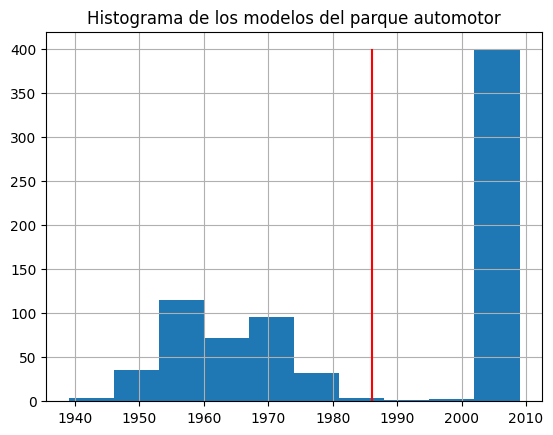

In [ ]:
#Grafica del histograma de modelos
plt.hist(modelo_a, bins=10)
plt.axvline(np.mean(modelo_a), ymin=0.0, ymax=0.95,color='r')
plt.title('Histograma de los modelos del parque automotor')
plt.grid()
plt.show()

plt.boxplot(): Genera un diagrama de caja para los datos en modelo_a. El diagrama de caja muestra la distribución de los datos, incluyendo la mediana, los cuartiles y los valores atípicos.

Este diagrama de caja es útil para visualizar la distribución de los modelos de vehículos, incluyendo la mediana, los cuartiles y cualquier valor atípico que pueda existir en los datos. Esto te proporciona información sobre la variabilidad y la dispersión de los modelos en el parque automotor.

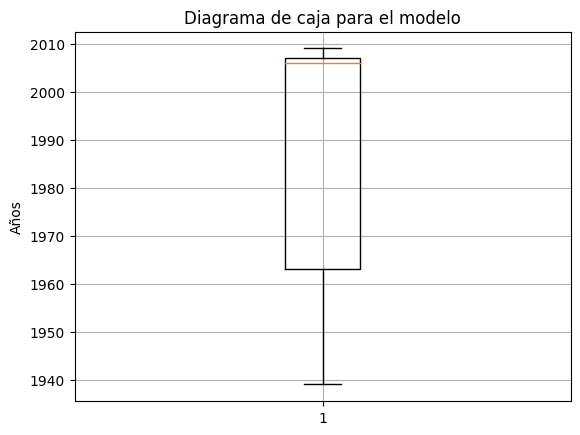

In [ ]:
#Graficas el diagrama de caja de los modelos
plt.boxplot(modelo_a)
plt.title('Diagrama de caja para el modelo')
plt.ylabel('Años')
plt.grid()
plt.show()

df_auto[['clase']]: Esto selecciona la columna 'clase' del DataFrame df_auto. El doble corchete ([[...]]) se utiliza para seleccionar columnas como una lista, lo que resulta en un DataFrame en lugar de una Serie.

In [ ]:
#Analisis de las clases del parque automotor
df_clase=df_auto[['clase']]
df_clase.head()

,clase
0,CAMIONETA
1,AUTOMOVIL
2,CAMIONETA
3,CAMPERO
4,CAMIONETA


In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   clase   763 non-null    object
dtypes: object(1)
memory usage: 28.1+ KB


Últimas filas del DataFrame df_clase, lo que te permitirá ver los valores de la columna 'clase' en esas filas específicas.

In [ ]:
df_clase.tail()

,clase
995,CAMPERO
996,CAMPERO
997,CAMIONETA
998,AUTOMOVIL
999,CAMIONETA


Convierte la columna 'clase' del DataFrame df_clase en una lista llamada lista_clase, e imprime cada valor de esta.

In [ ]:
lista_clase=list(df_clase['clase'])
for i in lista_clase:
  print(i)

In [ ]:
df_clase.describe()

,clase
count,763
unique,11
top,AUTOMOVIL
freq,268


In [ ]:
#Vamos a contar las diferentes clases de automoviles
def contar(n, vec):
  '''Para esta funcion n es el numero a contar y vec es la lista donde contar '''
  count=0
  for i in vec:
    if i==n:
      count+=1
  return count

In [ ]:
print('AUTOMOVIL aparece: ',contar('AUTOMOVIL', lista_clase))
print('CAMPERO aparece: ',contar('CAMPERO', lista_clase))
print('CAMIONETA aparece: ',contar('CAMIONETA', lista_clase))
print('CAMION aparece: ',contar('CAMION', lista_clase))
print('MOTOCICLETA aparece: ',contar('MOTOCICLETA', lista_clase))
print('VOLQUETA aparece: ',contar('VOLQUETA', lista_clase))
print('BUSETA aparece: ',contar('BUSETA', lista_clase))
print('MICRO BUS aparece: ',contar('MICRO BUS', lista_clase))

aux=[contar('AUTOMOVIL', lista_clase), contar('CAMPERO', lista_clase),contar('CAMIONETA', lista_clase),
     contar('CAMION', lista_clase),contar('MOTOCICLETA', lista_clase), contar('VOLQUETA', lista_clase),
     contar('BUSETA', lista_clase) , contar('MICRO BUS', lista_clase)]
print('La suma total es de: ', sum(aux))


AUTOMOVIL aparece:  268
CAMPERO aparece:  123
CAMIONETA aparece:  179
CAMION aparece:  34
MOTOCICLETA aparece:  144
VOLQUETA aparece:  9
BUSETA aparece:  1
MICRO BUS aparece:  2
La suma total es de:  760


En cada iteración, se llama a la función contar() para contar el número de ocurrencias de la clase de automóvil en el índice i en la lista lista_clase. El resultado se agrega a la lista num_clase.

In [ ]:
num_clase=[]
for i in range(len(lista_clase)):
  num_clase.append(contar(lista_clase[i],lista_clase))

print(num_clase)
print(len(num_clase))

[179, 268, 179, 123, 179, 123, 179, 268, 179, 268, 268, 268, 268, 123, 268, 268, 123, 268, 123, 123, 179, 179, 179, 179, 179, 179, 179, 34, 179, 34, 179, 34, 34, 34, 34, 34, 9, 268, 268, 268, 268, 268, 268, 268, 268, 268, 123, 268, 179, 123, 179, 268, 123, 179, 268, 123, 179, 268, 123, 268, 268, 268, 179, 179, 179, 179, 34, 34, 34, 123, 9, 268, 268, 179, 179, 123, 179, 179, 268, 179, 268, 268, 123, 144, 144, 123, 123, 268, 268, 123, 268, 268, 123, 123, 268, 268, 179, 123, 179, 268, 179, 179, 179, 268, 268, 268, 268, 268, 123, 123, 123, 179, 268, 144, 179, 268, 268, 268, 179, 123, 179, 123, 268, 144, 268, 268, 268, 123, 123, 123, 123, 123, 268, 268, 179, 179, 179, 144, 268, 268, 268, 144, 268, 268, 144, 179, 179, 268, 268, 268, 123, 268, 268, 179, 179, 268, 179, 268, 268, 123, 179, 268, 268, 268, 268, 268, 268, 268, 179, 179, 268, 179, 268, 268, 268, 268, 268, 123, 179, 268, 179, 123, 268, 268, 268, 179, 268, 123, 268, 179, 268, 268, 179, 268, 123, 268, 123, 179, 179, 268, 268, 268, 268

plt.bar() se usa para crear un diagrama de barras.

Se proporciona la lista de categorías categoria como los valores del eje x y la lista aux que contiene el número de ocurrencias de cada clase de automóvil como los valores del eje y.

El parámetro width especifica el ancho de las barras y el parámetro color establece el color de las barras.

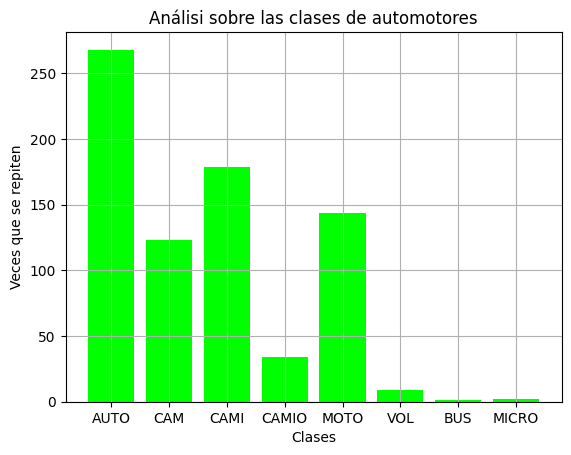

In [ ]:
#Diagrama de Barras
categoria=['AUTO','CAM','CAMI','CAMIO', 'MOTO','VOL','BUS','MICRO']
plt.bar(categoria,aux,width=0.8, color='lime')
plt.xlabel('Clases')
plt.ylabel('Veces que se repiten')
plt.title('Análisi sobre las clases de automotores')
plt.grid()
plt.show()

In [ ]:
len(num_clase)

763

In [ ]:
#Punto 9
#Se debe incluir mínimo una tabla pivote y una agrupación
df_auto.head()


,municipio,clase,marca,linea,modelo,carroceria,pasajeros,tonelaje,cilindraje,servicio,estado,blindaje,importado,puertas
0,COMBITA,CAMIONETA,CHEVROLET,SIN LINEA,1951,PANEL,0,1.00,2500,PARTICULAR,ACTIVO,N,N,2
1,SOGAMOSO,AUTOMOVIL,CHEVROLET,IMPALA,1959,COUPE,5,0.00,2400,PARTICULAR,ACTIVO,N,S,2
2,PAIPA,CAMIONETA,MERCURY,SIN LINEA,1950,ESTACA,0,1.00,1,PARTICULAR,ACTIVO,N,N,2
3,TUNJA,CAMPERO,JEEP WILLYS,STATION WAGON,1964,STATION WAGON,5,0.00,2400,PARTICULAR,ACTIVO,N,N,2
4,SANTA ROSA DE VITERBO,CAMIONETA,PLYMOUHT,VALIANT,1955,ESTACA,5,0.75,2200,PARTICULAR,ACTIVO,N,N,2


df_auto.pivot_table(): Este método crea una tabla pivote a partir del DataFrame df_auto.

values='modelo': Esto especifica que la variable 'modelo' se utilizará como los valores de la tabla pivote.

index='municipio': Esto especifica que la variable 'municipio' se utilizará como el índice de la tabla pivote.

columns=['servicio']: Esto especifica que la variable 'servicio' se utilizará para crear columnas en la tabla pivote. Como se proporciona una lista, se pueden crear múltiples columnas en la tabla pivote.

aggfunc='count': Esto especifica que la función de agregación a aplicar es 'count', lo que significa que se contará el número de modelos de automóviles para cada combinación única de municipio y tipo de servicio.

In [ ]:
df_auto.pivot_table(values='modelo', index='municipio', columns=['servicio'], aggfunc='count')

servicio,PARTICULAR
municipio,
CHIQUINQUIRA,11
COMBITA,75
DUITAMA,34
GARAGOA,7
GUATEQUE,12
MIRAFLORES,4
MONIQUIRA,15
NOBSA,34
PAIPA,376


df_auto.groupby(df_auto['municipio']).count()[['importado']]: Proporciona un recuento de cuántas veces aparece cada valor único en la columna 'importado' para cada municipio en tu conjunto de datos df_auto.

In [ ]:
df_auto.groupby(df_auto['municipio']).count()[['importado']]

,importado
municipio,
CHIQUINQUIRA,11
COMBITA,75
DUITAMA,34
GARAGOA,7
GUATEQUE,12
MIRAFLORES,4
MONIQUIRA,15
NOBSA,34
PAIPA,376


Lo mismo aplicado a la columna "Marca".

In [ ]:
df_auto.groupby(df_auto['municipio']).count()['marca']


municipio
CHIQUINQUIRA              11
COMBITA                   75
DUITAMA                   34
GARAGOA                    7
GUATEQUE                  12
MIRAFLORES                 4
MONIQUIRA                 15
NOBSA                     34
PAIPA                    376
PUERTO BOYACA              1
RAMIRIQUI                  6
SABOYA                    21
SANTA ROSA DE VITERBO     69
SOATA                      4
SOGAMOSO                  23
TUNJA                     66
VILLA DE LEYVA             5
Name: marca, dtype: int64

In [ ]:
lis=list(df_auto['municipio'])
for i in lis:
  print(i)

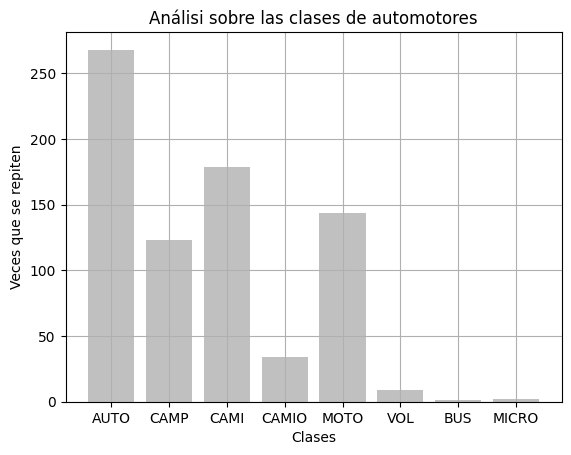

In [ ]:
#Punto 10
#Todas las graficas deben ser explicadas
#Diagrama de Barras
categoria=['AUTO','CAMP','CAMI','CAMIO', 'MOTO','VOL','BUS','MICRO']
plt.bar(categoria,aux,width=0.8, color='silver')
plt.xlabel('Clases')
plt.ylabel('Veces que se repiten')
plt.title('Análisi sobre las clases de automotores')
plt.grid()
plt.show()

**Análsis de la grafica**



*   Se evidencia que la categoria de Automovil es la más predominante con más de 250 registros.
*   La segunda categoria predominante es la camioneta con +150 registros
* La categoria con menor registro es la buseta, el cual tiene un solo registro.






**Analisis desde Chat GPT**

El tipo de vehículo más común en la tabla es el "automovil" con un total de 268 unidades registradas, seguido por las "camionetas" con 179 unidades y las "motocicletas" con 144 unidades.

Los "camiones" y las "volquetas" tienen una presencia mucho menor en comparación con los otros tipos de vehículos. Hay solo 34 camiones y 9 volquetas registradas.

Los "buses" y los "microbuses" tienen una presencia muy limitada en esta muestra de datos, con solo 1 bus y 2 microbuses registrados.

La suma total de todos es de:  760

In [ ]:
print(aux)
print(categoria)

[268, 123, 179, 34, 144, 9, 1, 2]
['AUTO', 'CAMP', 'CAMI', 'CAMIO', 'MOTO', 'VOL', 'BUS', 'MICRO']


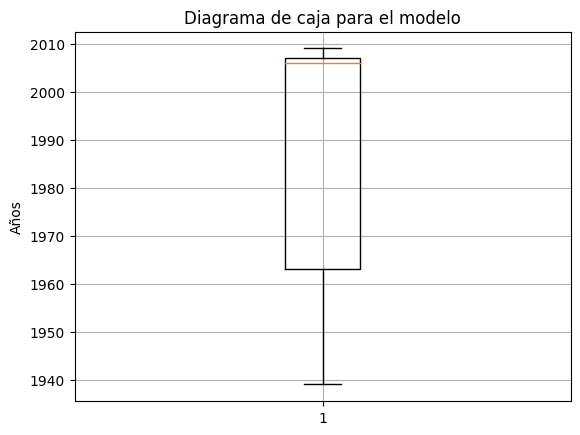

In [ ]:
#Graficas el diagrama de caja de los modelos
plt.boxplot(modelo_a)
plt.title('Diagrama de caja para el modelo')
plt.ylabel('Años')
plt.grid()
plt.show()

Este diagrama muestra que en los eqipos registrados la mayor proporción de concetración de vehiculo son modelo 1994, lo cual indica que el parque automotor tiene una edad alrededor de los 30 años. Las implicaciones de esta medida afecatan en varios escenarios por ejemplo:
1. El medio ambiente, ya que la emisión de gases afecta de manera negativa
2. La seguridad de los usuarios en vehiculos de uso publico.
3. La capacidad de transito de los vehiculos.

Según la grafica, se observa que aún existe vehiculos de la dedaca del 50. Se deja abierto la posibilidad de analisis de estos vehiculos para conocer si son vehiculos de exibición o de uso particular.

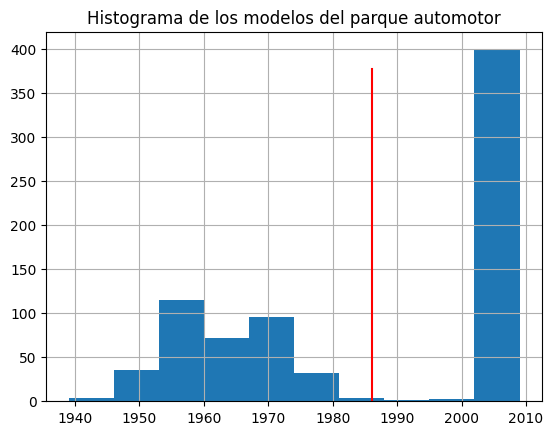

In [ ]:
#Grafica del histograma de modelos
plt.hist(modelo_a, bins=10)
plt.axvline(np.mean(modelo_a), ymin=0.0, ymax=0.9,color='r')
plt.title('Histograma de los modelos del parque automotor')
plt.grid()
plt.show()

En el histograma que representa los diferente modelos de automotores en la data set, se encuenra que la concentración de modelos esta al rededor de la decada de los 90. Esto implica que se debe tener un proposito de recambio del parque automotor en el desapartamento de Boyaca. Los posobles beneficios de este recambio pueden tener un impacto positivo en la economia, ya que se pueden activar varios frentes comerciales.